In [55]:
# policy gradients
""" policy gradient function file """
import numpy as np


def policy(state, weight):
    """ computes to policy with a weight of a matrix 
        does via the softmax of the observations * the weights
        returns a policy which is probabilities of weights
    """
    unweighted = state @ weight
    # print(unweighted)
    ret = np.exp(unweighted - np.max(unweighted))
    # ret = np.exp(unweighted)
    # either works just changes when normalization occurs
    return ret / np.sum(ret)


def policy_gradient(state, weight):
    """ computes the monte-carlo policy gradient based on matrix and weights
        state: matrix representing current observation of environment
        weight: matrix of random weight
        return: action and gradient ( in that order)
    """
    # print("into policy gradient f'n")
    pol = policy(state, weight)
    # print(pol)
    # print("created policy")
    action = np.random.choice(pol[0].shape[0], p=pol[0])
    # print("selected action")
    s = pol.reshape(-1, 1)
    # print(s)
    # print("made s")
    dsoftmax = (np.diagflat(s) - np.dot(s, s.T))[action, :]
    # print("made dsoftmax")
    dlog = dsoftmax / pol[0, action]
    # print("made dlog")
    grad = state.T.dot(dlog[None, :])
    # print("made grad")
    return action, grad

In [56]:
# 1 main
import gym
import numpy as np
# from policy_gradient import policy_gradient

env = gym.make('CartPole-v1')
np.random.seed(1)

weight = np.random.rand(4, 2)
state = env.reset()[None,:]
print(weight)
print(state)

action, grad = policy_gradient(state, weight)
print(action)
print(grad)

env.close()

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]]
[[0.03900746 0.04543915 0.04721071 0.01604548]]
0
[[ 0.01975288 -0.01975288]
 [ 0.02300981 -0.02300981]
 [ 0.0239069  -0.0239069 ]
 [ 0.00812523 -0.00812523]]


In [85]:
#training
""" the trtaining method using policy gradients """
import numpy as np
# import policy_gradient as pg


def train(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):
    """ train the policy gradients
        env: the initia environment (from openai gym)
        nb_episodes: number of episodes for training
        alpha: learning rate
        gamma: discount factor
        Returns: all vlaues of the score (sum of rewards during ea. episode)
    """
    # initializ future return
    scores = []
    # initialize rnadom starting weights
    weights = np.random.rand(env.observation_space.shape[0], 
                             env.action_space.n)
    # loop through episodes performing steps
    for ep in range(nb_episodes):
        state = env.reset()[None,:]
        # initialize variables for the step
        grads = []
        rewards = []
        actions = []
        done = False
        counter = 0
        # run episode
        while not done:
            if show_result and ep % 1000 == 0:
                env.render()
            # for use out of colab
            # action, grad = pg.policy_gradient(state, weights)
            # print("state, weight")
            # print(state, weights)
            action, grad = policy_gradient(state, weights)
            # print("past action creation")
            state, reward, done, info = env.step(action)
            state = state[None,:]
            grads.append(grad)
            rewards.append(reward)
            actions.append(action)
            counter += 1
        # another failed attempt to get it to render
        # if show_result and ep % 1000 == 0:
        #   env.play()
        # when episodes ended calculate rewards/new weights
        for i in range(len(grads)):
            # Loop through everything that happend in the episode
            rew = sum([ r * (gamma ** r) for t,r in enumerate(rewards[i:])])
            weights += alpha * grads[i] * rew
        # end_reward = 0
        # for i in range(counter)
        #     end_reward = reward[counter - i] + end_reward * gamma
        #     weights[:, action] += alpha * grad[:, action] * 
        scores.append(sum(rewards))
        print(ep, scores[ep], end="", flush=False)
    return scores

0 14.01 12.02 20.03 12.04 13.05 12.06 14.07 27.08 16.09 30.010 16.011 16.012 19.013 9.014 17.015 10.016 22.017 18.018 12.019 8.020 17.021 9.022 35.023 11.024 17.025 10.026 15.027 23.028 11.029 16.030 29.031 13.032 39.033 18.034 22.035 13.036 16.037 11.038 10.039 15.040 20.041 12.042 18.043 15.044 19.045 9.046 13.047 11.048 10.049 29.050 18.051 24.052 12.053 24.054 12.055 18.056 11.057 13.058 15.059 14.060 16.061 11.062 33.063 19.064 11.065 18.066 15.067 16.068 14.069 16.070 12.071 12.072 21.073 14.074 14.075 10.076 16.077 12.078 15.079 31.080 9.081 19.082 14.083 11.084 22.085 13.086 13.087 11.088 30.089 12.090 24.091 12.092 12.093 15.094 20.095 16.096 13.097 14.098 14.099 10.0100 15.0101 34.0102 12.0103 29.0104 17.0105 11.0106 10.0107 14.0108 13.0109 14.0110 14.0111 11.0112 14.0113 29.0114 11.0115 10.0116 14.0117 11.0118 12.0119 15.0120 33.0121 33.0122 20.0123 18.0124 11.0125 12.0126 30.0127 25.0128 11.0129 24.0130 16.0131 12.0132 20.0133 12.0134 47.0135 11.0136 16.0137 11.0138 25.0139

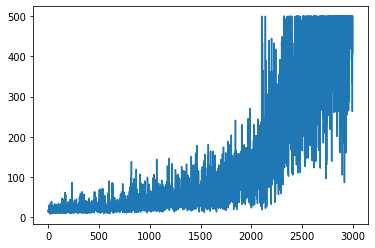

In [86]:
# 2 main
import gym
import matplotlib.pyplot as plt
import numpy as np

# from train import train

env = gym.make('CartPole-v1')

scores = train(env, 3000)

plt.plot(np.arange(len(scores)), scores)
plt.show()
env.close()

In [ ]:
#!/usr/bin/env python3
"""
Main file
"""
import gym
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender
from colabgymrender.recorder import Recorder
"""
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()
"""

env = gym.make('CartPole-v1')
# if using colabgymrender module
directory = './video'
env = Recorder(env, directory)

scores = train(env, 10000, 0.000045, 0.98, True)

env.close()
